In [25]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.pyplot import MultipleLocator
from scipy.stats import linregress
import numpy as np

In [10]:
#path for alternative splicing type length and TM-score
tm_score_length_path='../data/csv/tm_score_length.csv'

#path for match sequence identity and TM-score
tm_score_path='../data/json/tm_score.json'
as_event_path='../data/json/as_event.json'
sequence_identity_path='../data/json/sequence_identity.json'
reference_hgih_confident_path='../data/csv/reference_high_confident.csv'
isoform_hgih_confident_path='../data/csv/isoform_high_confident.csv'

In [11]:
def load_file_json(path):
    with open(path,'r') as load_f:
        file=json.load(load_f)
    return file

<span style="font-size: 20px;">Plot alternative splicing type length and TM-score: </span>

In [12]:
tm_score_length=pd.read_csv(tm_score_length_path)

In [46]:
#plot the length caused by each alternaitve splicing event and the TM-score
def plot_length_tm(tm_align_length_df):
    tm_list=[]
    length_list=[]
    tm_align_length_df=tm_align_length_df.rename(columns={'exon_skipping':'Exon skipping',
                 'alternative_donor_site':'Alternative donor site',
                 'alternative_acceptor_site':'Alternative acceptor site',
                 'mutually_exclusive_exon':'Mutually exclusive exon',
                 'intron_retention':'Intron retention',
                 'alternative_first_exon':'Alternative first exon',
                 'alternative_last_exon':'Alternative last exon',
                 'mutually_exclusive_exon-alternative_first_exon':'Mutually exclusive exon Alternative first exon',
                 'mutually_exclusive_exon-alternative_last_exon':'Mutually exclusive exon Alternative last exon'})
    x_col=['Exon skipping','Alternative donor site', 'Alternative acceptor site',
           'Mutually exclusive exon', 'Intron retention', 'Alternative first exon','Alternative last exon',
           'Mutually exclusive exon Alternative first exon','Mutually exclusive exon Alternative last exon']
    fig, ax = plt.subplots(figsize=(12,8))
    color_order=['#000066','#B266FF','#009900','#CC6600','#3399FF','#FF66B2','#FF0000','#99FF33','#330000']
    for i, col in enumerate(x_col):
        mask = tm_align_length_df[col] > 0
        corr=tm_align_length_df[mask][col].corr(tm_align_length_df[mask]['tm_align'],method='pearson')
        ax.scatter(tm_align_length_df[mask][col], tm_align_length_df[mask]['tm_align'],label=col,alpha=0.2,s=4,c=color_order[i])
        slope, intercept, r_value, p_value, std_err = linregress(tm_align_length_df[mask][col], tm_align_length_df[mask]['tm_align'])
        line = slope * tm_align_length_df[mask][col] + intercept
        ax.plot(tm_align_length_df[mask][col], line, color=color_order[i], linewidth=1.5)

    ax.legend(bbox_to_anchor=(1,0.5),title='Alternative splicing type',frameon=False,title_fontsize=20,fontsize=20)
    y_locator = ticker.MultipleLocator(base=0.2)
    plt.gca().yaxis.set_major_locator(y_locator)
    x_locator = ticker.MultipleLocator(base=150)
    plt.gca().xaxis.set_major_locator(x_locator)
    plt.yticks(fontsize=18,weight='bold')
    plt.xticks(fontsize=18,weight='bold')
    plt.ylabel('TM-score',fontsize=18,weight='bold')
    plt.xlabel('Alternative splicing length',fontsize=18,weight='bold')
    #plt.savefig('length_tm_add_line.png',dpi=500,bbox_inches='tight')
    plt.show()
    return True

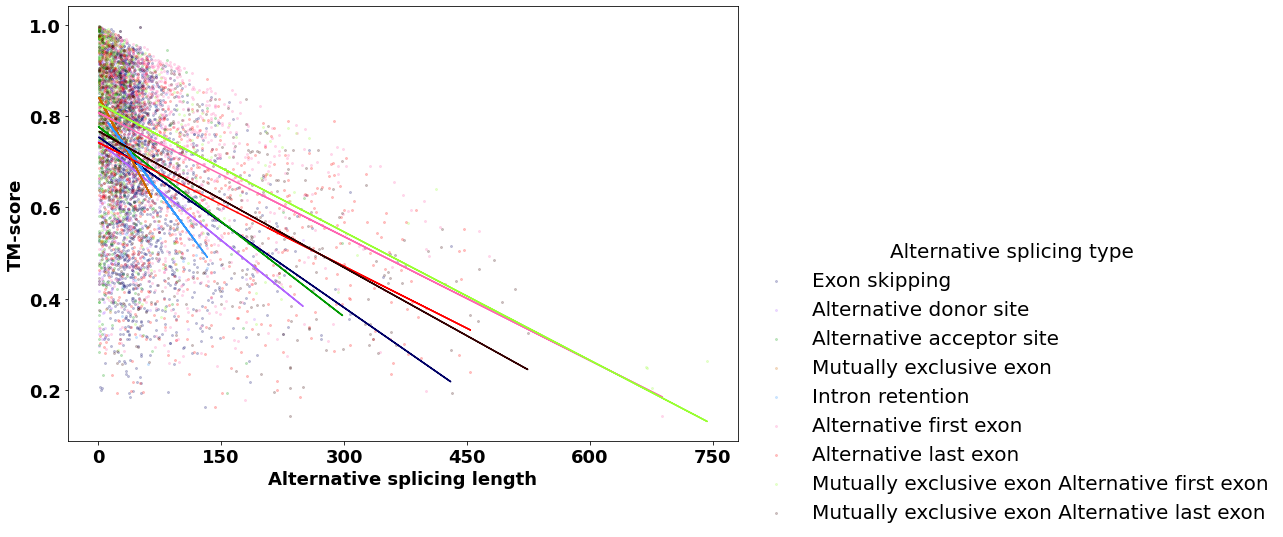

True

In [47]:
plot_length_tm(tm_score_length)

<span style="font-size: 20px;">Plot sequence identity and TM-score: </span>

In [22]:
#load data
tm_score=load_file_json(tm_score_path)
sequence_identity=load_file_json(sequence_identity_path)
as_event=load_file_json(as_event_path)
isoform_high_confident=pd.read_csv(isoform_hgih_confident_path)
reference_high_confident=pd.read_csv(reference_hgih_confident_path)

In [18]:
#select only high and confident structures
def combine_metric_quality(metric_dic,isoform_quality_csv,reference_quality_csv):
    quality_metric_dic={}
    for entry in metric_dic.keys():
        ref=entry.split('-')[0]
        if entry in list(isoform_quality_csv['isoform']) and ref in list(reference_quality_csv['reference']):
            quality_metric_dic[entry]=metric_dic[entry]
    return quality_metric_dic
high_confident_tm=combine_metric_quality(tm_score,isoform_high_confident,reference_high_confident)

In [19]:
#show interesting examples
different_helix_orientation_list=['O60499-2','P27701-2','A8MT69-3','Q9UL16-2','P24001-6','Q5J8X5-2','Q8IXM6-2','Q92569-2',
                                  'Q9HD89-2','Q86UA6-2','Q969E2-2','Q9UKR8-3','Q07812-4','O00161-2']
loss_of_repeat_domain_list=['O00481-4','Q7L513-8','Q7Z4I7-5','Q9Y286-2','Q9NYZ4-2','Q02985-2']
structure_compactly_change_list=['Q99836-2','Q9BUX1-2','Q9UKT5-2','Q96MS3-2','Q9NZI8-2','O14713-2','Q9UN36-4','Q14994-15',
                                 'Q8NDX2-2','P61956-2','Q68CL5-1','Q9BQ65-2','O43766-3','P40926-2','P40926-2']

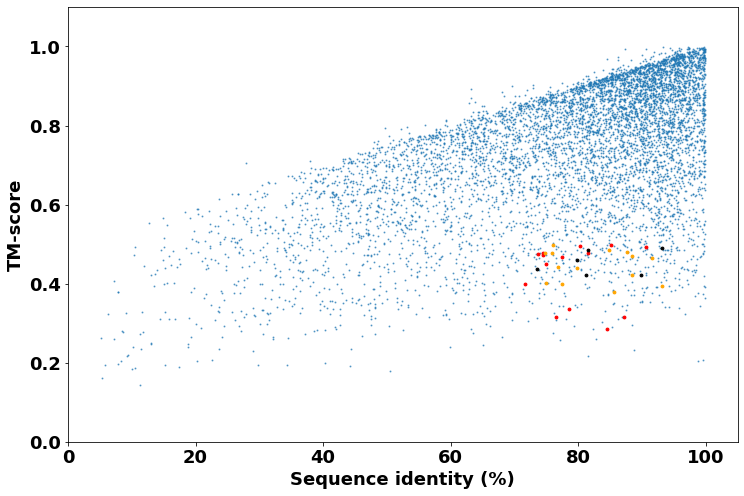

In [25]:
#plot
def plot_id_tm_class(identity_dic,tm_dic,as_event,different_helix_orientation_list,loss_of_repeat_domain_list,structure_compactly_change_list):
    tm_list=[]
    identity_list=[]
    different_helix_orientation_tm_list=[]
    different_helix_orientation_identity_list=[]
    loss_of_repeat_domain_tm_list=[]
    loss_of_repeat_domain_identity_list=[]
    structure_compactly_change_tm_list=[]
    structure_compactly_change_identity_list=[]
    high_id_low_tm_dic={'isoform':[],'identity':[],'tm_align':[],'as_event':[]}
    for isoform in tm_dic.keys():  
        if identity_dic[isoform]>70 and tm_dic[isoform]<0.5:
            if isoform in different_helix_orientation_list:
                different_helix_orientation_tm_list.append(tm_dic[isoform])
                different_helix_orientation_identity_list.append(identity_dic[isoform])
            elif isoform in loss_of_repeat_domain_list:
                loss_of_repeat_domain_tm_list.append(tm_dic[isoform])
                loss_of_repeat_domain_identity_list.append(identity_dic[isoform])
            elif isoform in structure_compactly_change_list:
                structure_compactly_change_tm_list.append(tm_dic[isoform])
                structure_compactly_change_identity_list.append(identity_dic[isoform])
            else:
                tm_list.append(tm_dic[isoform])
                identity_list.append(identity_dic[isoform])
            high_id_low_tm_dic['isoform'].append(isoform)
            high_id_low_tm_dic['identity'].append(identity_dic[isoform])
            high_id_low_tm_dic['tm_align'].append(tm_dic[isoform])
            if isoform in as_event.keys():
                high_id_low_tm_dic['as_event'].append(1)
            else:
                high_id_low_tm_dic['as_event'].append(0)
        else:
            tm_list.append(tm_dic[isoform])
            identity_list.append(identity_dic[isoform]) 
    identity_list=pd.Series(identity_list)
    tm_list=pd.Series(tm_list)
    corr=tm_list.corr(identity_list,method='pearson')
    fig = plt.figure(figsize=(12,8))
    y_locator = ticker.MultipleLocator(base=0.2)
    plt.gca().yaxis.set_major_locator(y_locator)
    plt.xlabel("Sequence identity (%)",fontsize=18,weight='bold')  
    plt.ylabel("TM-score",fontsize=18,weight='bold')
    plt.scatter(identity_list,tm_list,s=1,alpha=0.6)
    plt.scatter(different_helix_orientation_identity_list,different_helix_orientation_tm_list,s=8,c='red')
    plt.scatter(loss_of_repeat_domain_identity_list,loss_of_repeat_domain_tm_list,s=8,c='black')
    plt.scatter(structure_compactly_change_identity_list,structure_compactly_change_tm_list,s=8,c='orange')
    y_major_locator=MultipleLocator(0.2)
    plt.ylim(0,1.1)
    plt.xlim(0,105)
    plt.yticks(fontsize=18,weight='bold')
    plt.xticks(fontsize=18,weight='bold')
    high_id_low_tm_df=pd.DataFrame(high_id_low_tm_dic)
    plt.show()
    return high_id_low_tm_df
high_id_low_tm_df=plot_id_tm_class(sequence_identity,high_confident_tm,as_event,different_helix_orientation_list,loss_of_repeat_domain_list,structure_compactly_change_list)